# Project fruit
The goal of this project is classifying fruits and determining its ripeness

In [60]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import load_model
import os

# Needed?
for dirname, _, filenames in os.walk('/data/fruits-360'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [62]:
# Remove unnecessary things
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import img_to_array, load_img

In [3]:
train_path = '/Users/alexandersellin/Documents/Programmering/Phyton/D7047E/Project/Fruit_quality_dataset/Train/'
test_path = '/Users/alexandersellin/Documents/Programmering/Phyton/D7047E/Project/Fruit_quality_dataset/Test/'

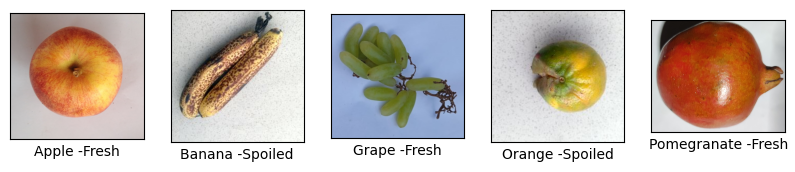

In [58]:
# Insert fruits that you want to inspect
# fruits = ['Banana', 'Apple Granny Smith', 'Kiwi', 'Pear', 'Tomato 1', 'Strawberry', 'Mango', 'Avocado', 'Orange', 'Watermelon']
fruits = ['Apple', 'Banana', 'Grape', 'Orange', 'Pomegranate']
# Which image in the folder
fruitnr = 1
ripe=False
Ripe="-Fresh"
plt.figure(figsize=(10,10))
for i in range(len(fruits)):
    img = load_img(train_path + "{fruit}{ripe}/{filename}"
                   .format(ripe=Ripe,fruit=fruits[i], filename=os.listdir(train_path +  fruits[i] +Ripe )[fruitnr-1]))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)
    plt.xlabel(fruits[i] + ' ' + Ripe)
    if ripe==True:
        Ripe="-Fresh"
        ripe=False
    elif ripe==False:
        Ripe="-Spoiled"
        ripe=True
plt.show()

In [22]:
img = img_to_array(img)
img.shape

(2232, 2664, 3)

In [63]:
VGG16 = tf.keras.applications.vgg16.VGG16(include_top=False, input_shape=(100,100,3))

# Get the list of subdirectories
subdirectories = [f.path for f in os.scandir(train_path) if f.is_dir()]

# Count the number of subdirectories
num_classes = len(subdirectories)

model = Sequential()

model.add(VGG16)

# Lower dropout rate?
model.add(Flatten())
model.add(Dense(3*384, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(3*128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='Softmax'))

model.summary()

# Freeze
#for layer in new_model.layers[:-2]:
    # layer.trainable = False

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 1152)              5309568   
                                                                 
 dropout (Dropout)           (None, 1152)              0         
                                                                 
 dense_1 (Dense)             (None, 384)               442752    
                                                                 
 dropout_1 (Dropout)         (None, 384)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                3

In [64]:
model.compile(loss="categorical_crossentropy", optimizer = "Adam", metrics = ["accuracy"])

In [65]:
# Choose transformations
train_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    shear_range = 0.3,
                    horizontal_flip=True,
                    vertical_flip=False,
                    zoom_range = 0.3
                    )
test_datagen  = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_path,
                                                    target_size=(100,100),
                                                    batch_size = 32,
                                                    color_mode= "rgb",
                                                    class_mode = "categorical")
test_generator = test_datagen.flow_from_directory(test_path,
                                                    target_size=(100,100),
                                                    batch_size = 32,
                                                    color_mode= "rgb",
                                                    class_mode = "categorical")

Found 8710 images belonging to 10 classes.
Found 1215 images belonging to 10 classes.


In [67]:
# Choose epochs
# What is steps per epoch? =batch_size?
hist = model.fit_generator(generator = train_generator, 
                   epochs = 50,
                   validation_data = test_generator,
                   validation_steps = 50)

/var/folders/3b/x8dnhfzn5sg5zrjj3207k0j40000gn/T/ipykernel_42259/2216200107.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(generator = train_generator,


Epoch 1/50
273/273 [==============================] - 805s 3s/step - loss: 2.1449 - accuracy: 0.1417 - val_loss: 2.1687 - val_accuracy: 0.2239
Epoch 2/50
273/273 [==============================] - 746s 3s/step - loss: 2.1254 - accuracy: 0.1400
Epoch 3/50
273/273 [==============================] - 746s 3s/step - loss: 2.1261 - accuracy: 0.1400
Epoch 4/50
273/273 [==============================] - 728s 3s/step - loss: 2.1248 - accuracy: 0.1423
Epoch 5/50
229/273 [========================>.....] - ETA: 2:01 - loss: 2.1226 - accuracy: 0.1406

In [ ]:
# Does not work
model.save("Fruitmodel.h5")

In [85]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [86]:
test_generator.classes[22687]

130

In [ ]:
predictions = probability_model.predict(test_generator)

In [ ]:
b=predictions[8]
print(b)

In [ ]:
np.argmax(b)

In [ ]:
folder = 'archive/fruits-360/Test'

sub_folders = [name for name in os.listdir(folder) if os.path.isdir(os.path.join(folder, name))]

print(sub_folders[26])

In [ ]:
# plt.plot(history.history['accuracy'], label='accuracy')
# plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.ylim([0.5, 1])
# plt.legend(loc='lower right')

# test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
# print(test_acc)